In [2]:
!pip install pandas librosa scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for glob


In [6]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 3.4 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 3.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.2 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.1 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.0 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.0 MB/s eta 0:00:01
   ------------------------------- 


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [16]:
#audio_files = glob('../airs-ai-in-respiratory-sounds/sounds/sounds/*/cough.wav')
audio_files = glob('airs-ai-in-respiratory-sounds\\sounds\\sounds\\*\\cough.wav')

In [17]:
ipd.Audio(audio_files[0])

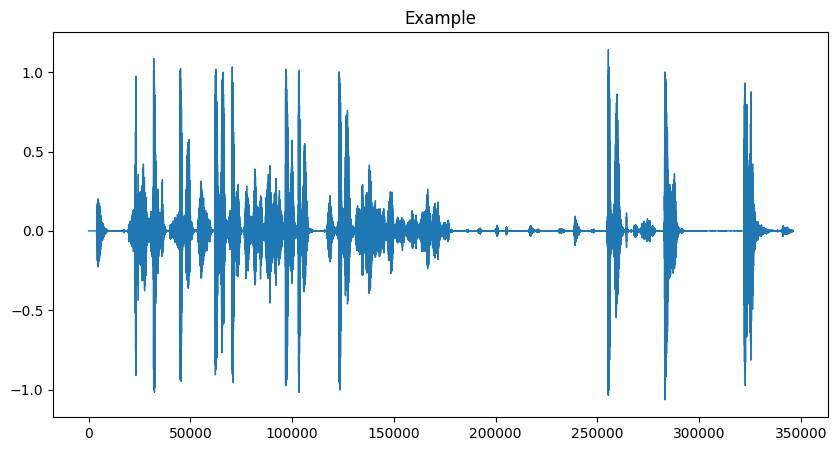

In [19]:
y, sr = librosa.load(audio_files[0])

pd.Series(y).plot(
    figsize=(10, 5),
    lw=1,
    title='Example',
)
plt.show()

Тримминг - обрезка пустых значений (в данном случае не особо помогает как я понял)

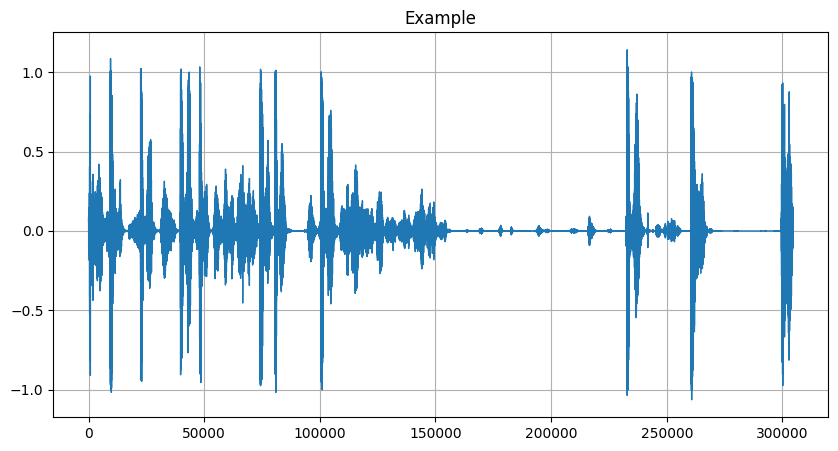

In [ ]:
y_trimmed, _ = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(
    figsize=(10, 5),
    lw=1,
    title='Example',
)
plt.show()

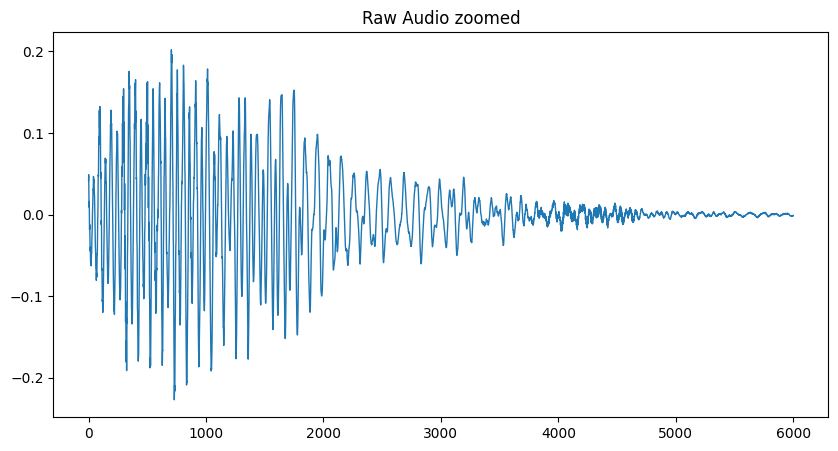

In [40]:
pd.Series(y[4000:10000]).plot(
    figsize=(10, 5),
    lw=1,
    title='Raw Audio zoomed'
)
plt.show()

In [41]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 677)

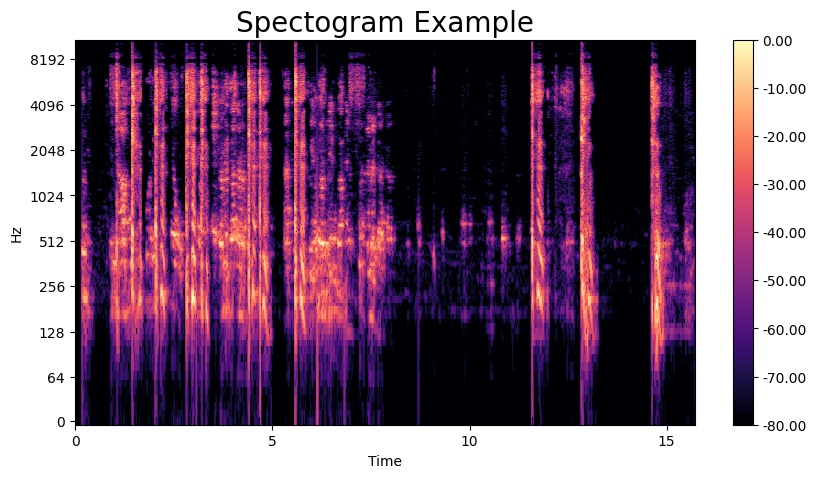

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [43]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

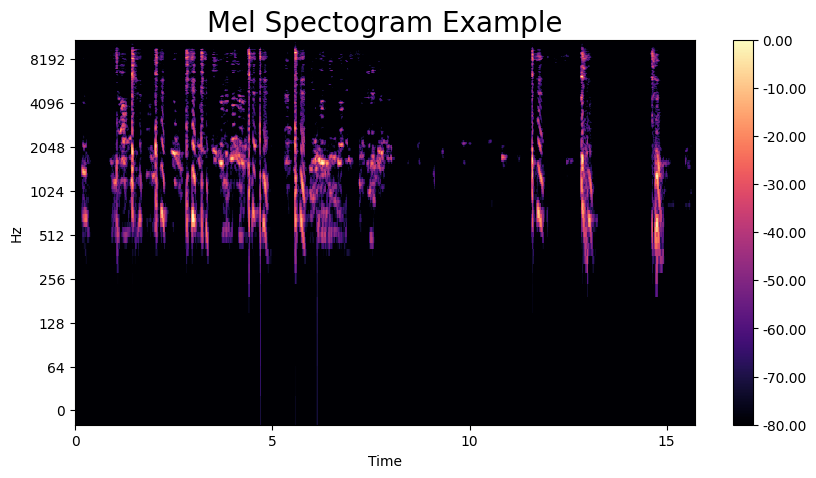

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()